# Notebook to train the model for angle correction

## Create data in the folders

All data must be in the same folder called 'raw_data' with 3 subfolders : 'train_pictures', 'test_pictures' and 'val_pictures'

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime
import random
import math
from tensorflow.keras.backend import expand_dims
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pyautogui
import cv2

import os
import pandas as pd
import numpy as np

In [32]:
path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'raw_data')
path

'C:\\Users\\jmarc\\Documents\\code\\HeavenlyBodeep\\raw_data'

In [33]:
def create_set(path_origin, n_angle = 1):
    images=list(set([int(i[:-4]) for i in os.listdir(path) if i[-4:]==".png"]))
    mapping_train = {'picture_id':[], 'angle' :[]}
    mapping_val = {'picture_id':[], 'angle' :[]}
    mapping_test = {'picture_id':[], 'angle' :[]}
    train_path = os.path.join(path_origin, 'train_pictures')
    val_path = os.path.join(path_origin, 'val_pictures')
    test_path = os.path.join(path_origin, 'test_pictures')

    name = 0
    index = 0
    images = random.sample(images, len(images))
    for val,image in enumerate(images):
        print(os.path.join(path_origin, f'{image}.png'))
        if val/len(images) < 0.65:
            original_image = Image.open(os.path.join(path_origin, f'{image}.png'))
            for angle in range(n_angle):
                angle = np.random.uniform(0,360)
                rotated_image = original_image.rotate(angle).crop((690,270,1190,770)).resize((100,100))
                rotated_image.save(os.path.join(train_path, f'{index}.png'))
                mapping_train['picture_id'].append(index)
                mapping_train['angle'].append(angle)
                index += 1
        elif val/len(images) < 0.85:
            original_image = Image.open(os.path.join(path_origin, f'{image}.png'))
            angle = np.random.uniform(0,360)
            rotated_image = original_image.rotate(angle).crop((690,270,1190,770)).resize((100,100))
            rotated_image.save(os.path.join(val_path, f'{index}.png'))
            mapping_val['picture_id'].append(index)
            mapping_val['angle'].append(angle)
            index += 1
        else:
            original_image = Image.open(os.path.join(path_origin, f'{image}.png'))
            angle = np.random.uniform(0,360)
            rotated_image = original_image.rotate(angle).crop((690,270,1190,770)).resize((100,100))
            rotated_image.save(os.path.join(test_path, f'{index}.png'))
            mapping_test['picture_id'].append(index)
            mapping_test['angle'].append(angle)
            index += 1


    df_train = pd.DataFrame(mapping_train)
    df_train.to_csv(os.path.join(train_path,'train.csv'),index=False)
    df_val = pd.DataFrame(mapping_val)
    df_val.to_csv(os.path.join(val_path,'val.csv'),index=False)
    df_test = pd.DataFrame(mapping_test)
    df_test.to_csv(os.path.join(test_path,'test.csv'),index=False)
    
    return None

In [34]:
create_set(path, n_angle = 3)

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\696.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1813.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1330.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\505.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1723.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\26.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1832.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1567.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1537.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\35.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1145.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\466.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1400.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\818.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\777.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\833.png
C:

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\453.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\764.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1469.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\703.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1991.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1304.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1205.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\574.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\269.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\816.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\190.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\628.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\177.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\927.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1885.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\825.png
C:\

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1346.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1850.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1543.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1562.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1802.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1181.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\2001.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\955.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1851.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\744.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\898.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1491.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1158.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1276.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1066.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\912.

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\875.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1298.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1080.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1167.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1977.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\106.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\957.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1213.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\148.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1854.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\519.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1271.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1602.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1637.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1488.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1909.p

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1814.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1159.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1592.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1557.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\374.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\57.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1446.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1035.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1539.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1938.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\2037.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\773.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1046.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1481.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1383.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1714.

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1611.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\2049.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\880.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\516.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\964.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1228.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1930.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\988.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\973.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1407.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\741.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\347.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\943.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1713.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\31.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\275.png
C:\

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1658.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1911.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1934.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1917.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1699.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\631.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1485.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\969.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\754.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1525.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\335.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1250.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1833.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1657.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1584.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\143.p

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1893.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1279.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\829.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1092.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\330.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\245.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\168.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1394.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\173.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1995.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1176.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\221.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\518.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\263.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\615.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1750.png
C

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\455.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1836.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\41.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\656.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\78.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\489.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1096.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1530.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1371.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\159.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1268.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\749.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1363.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\88.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\952.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1455.png
C:\U

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1737.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\922.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\356.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1762.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1373.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\682.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1740.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1351.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1999.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1274.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1403.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\164.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\386.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\156.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1182.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\841.png

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1196.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1804.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\331.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1795.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1656.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\178.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1508.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1618.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1739.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\745.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\288.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\93.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1156.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1871.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1322.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\989.png

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1107.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\252.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\205.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\670.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1385.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\202.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1922.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1655.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1263.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\2043.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\688.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1662.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\858.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1688.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\130.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\418.png


C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\743.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1563.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1117.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\697.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\295.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1848.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1919.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\81.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1012.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\897.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1332.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1906.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\819.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\481.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\11.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\438.png
C:\

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\82.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\334.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1327.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\814.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\583.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1178.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1901.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1552.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\698.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\739.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1990.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1711.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\661.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\636.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\163.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1704.png
C:

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\549.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\260.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1105.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1950.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\756.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1575.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\86.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\2000.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\548.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\140.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1281.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\720.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\302.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1065.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\397.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\425.png
C:\

C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\836.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\740.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\104.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1171.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1712.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1595.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\1017.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\378.png
C:\Users\jmarc\Documents\code\HeavenlyBodeep\raw_data\540.png


## Data preparation

### Data Split

In [35]:
def create_xy(path, set_part, method='sincos'):
    df = pd.read_csv(os.path.join(path, f'{set_part}_pictures', f'{set_part}.csv'))
    if method == 'sincos':
        df['cos'] = np.cos(df['angle']* np.pi / 180)
        df['sin'] = np.sin(df['angle']* np.pi / 180)
        y = np.array(df.drop(['angle', 'picture_id'], axis=1))
    else:
        df['angle'] = round(df['angle'],0).astype(int)
        y=np.array(df.drop(['picture_id'], axis=1).astype(str))[:,0]
    X = []
    X_index = list(df['picture_id'])
    name = 0
    for name in X_index:
        pic = Image.open(os.path.join(path, f'{set_part}_pictures', f'{name}.png'))
        X.append(np.array(pic)[:,:,0:3])
    X = np.array(X)
    return X, y

In [36]:
X_train, y_train = create_xy(path, 'train', method='sincos')

In [37]:
X_test, y_test = create_xy(path, 'test')

In [38]:
X_val, y_val = create_xy(path, 'val')

## Modeling with regression layer

In [39]:
from tensorflow.keras import layers, models

reg_l1 = regularizers.L1(0.01)
adam = optimizers.Adam(learning_rate=0.0001)

model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=X_train[0].shape))
model.add(layers.Conv2D(16, (5,5), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation="relu"))
model.add(layers.Conv2D(64, (3,3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (3,3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(16, (3,3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(8, (3,3), padding='same', activation="relu"))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) # intermediate layer - add : kernel_regularizer=reg_l1
model.add(layers.Dropout(rate=0.15))
model.add(layers.Dense(128, activation='relu')) # intermediate layer - add : kernel_regularizer=reg_l1
model.add(layers.Dropout(rate=0.15))
model.add(layers.Dense(2, activation='linear'))

model.compile(loss='mse',
          optimizer=adam,
          metrics=['mse'])

In [40]:
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1,
                              patience=4, min_lr=0.00001, min_delta=0.01)

In [41]:
es = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=4, epochs=200, callbacks=[es, reduce_lr])

Epoch 1/200
978/978 [==============================] - 35s 35ms/step - loss: 0.4966 - mse: 0.4966 - val_loss: 0.4969 - val_mse: 0.4969 - lr: 1.0000e-04
Epoch 2/200
978/978 [==============================] - 31s 32ms/step - loss: 0.4682 - mse: 0.4682 - val_loss: 0.4691 - val_mse: 0.4691 - lr: 1.0000e-04
Epoch 3/200
978/978 [==============================] - 32s 33ms/step - loss: 0.4442 - mse: 0.4442 - val_loss: 0.4547 - val_mse: 0.4547 - lr: 1.0000e-04
Epoch 4/200
978/978 [==============================] - 31s 32ms/step - loss: 0.4157 - mse: 0.4157 - val_loss: 0.4506 - val_mse: 0.4506 - lr: 1.0000e-04
Epoch 5/200
978/978 [==============================] - 31s 31ms/step - loss: 0.3727 - mse: 0.3727 - val_loss: 0.3675 - val_mse: 0.3675 - lr: 1.0000e-04
Epoch 6/200
978/978 [==============================] - 30s 31ms/step - loss: 0.3265 - mse: 0.3265 - val_loss: 0.3493 - val_mse: 0.3493 - lr: 1.0000e-04
Epoch 7/200
978/978 [==============================] - 30s 31ms/step - loss: 0.2803 - ms

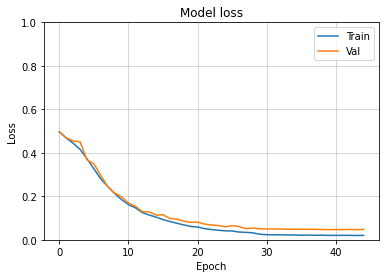

In [42]:
def plot_loss(history, title=None):
  
    # --- LOSS --- 
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim((0,1))
    plt.legend(['Train', 'Val'], loc='best')
    plt.grid(axis="x",linewidth=0.5)
    plt.grid(axis="y",linewidth=0.5)

plot_loss(history)

## Evaluation

In [43]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 27ms/step - loss: 0.0492 - mse: 0.0492


[0.04915490746498108, 0.04915490746498108]

In [44]:
y_pred = model.predict(X_test)

In [45]:
# predict_path = os.path.join(os.getcwd(), '..', 'raw_data', 'any_angle')

# img_predict = Image.open(os.path.join(predict_path, '2.png'))
# image = np.array(img_predict.crop((660,240,1260,840)).resize((64,64)))[:,:,0:3]

In [46]:
def angle(y_all):
    angle = []
    for y in y_all:
        angle2 = math.atan2(y[1], y[0])
        angle2 *= 180 / math.pi
        if angle2 < 0: angle2 += 360
        angle.append(angle2)
    return np.array(angle)

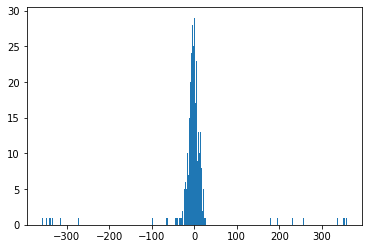

In [53]:
test_angle = angle(y_test)
pred_angle = angle(y_pred)
df = pd.DataFrame({'test_angle': angle(y_test), 'pred_angle': angle(y_pred)})
df['gap'] = df['test_angle'] - df['pred_angle']
plt.hist(x = df['gap'], bins=300);

In [48]:
df['gap'][np.abs(df['gap']) < 300].std()

33.32452570488652

In [49]:
df.sort_values('gap').tail(10)

,test_angle,pred_angle,gap
230,282.542708,259.345501,23.197207
102,238.623045,215.347558,23.275487
288,296.863518,271.815195,25.048323
81,268.013513,87.403605,180.609907
225,216.524154,21.344053,195.180100
15,307.102574,77.293805,229.808769
158,310.156258,52.988538,257.167720
74,357.910356,19.528678,338.381679
117,354.022829,1.729841,352.292988
175,359.343959,1.183233,358.160726


In [50]:
model.save(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'model2.h5'), save_format='h5')